# Talktorial 2

# Molecular filtering: ADME and lead-likeness criteria

#### Developed in the CADD seminars 2017 and 2018, AG Volkamer, Charité/FU Berlin 

Michele Ritschel and Mathias Wajnberg

## Aim of this talktorial

The compounds acquired from ChEMBL (**talktorial 1**) will be filtered by lead-likeliness criteria in order to remove less drug-like molecules from our screening library.

* Calculate molecular parameters related to bioavailability of compounds (Lipinski's rule of five)
* Filter compounds collected from ChEMBL by rule of five criteria
* Plot parameters in form of radar chart

## Learning goals

### Theory
* ADME - absorption, distribution, metabolism and excretion
* Lead-likeliness and Lipinski's rule of five
* Variations and interpretation of radar charts in the context of lead-likeliness

### Practical
* Calculate physicochemical parameters for example compounds
* Generate bar plots to compare individual physicochemical parameters for multiple molecules
* Write a function to check compliance with rule of five
* Apply rule of five to whole dataset retrieved from ChEMBL
* Generate a radar chart of our dataset filtered by the rule of five. This helps to visualize the properties in context of the rule of five criteria in one plot.

## References

* ADME criteria: ADME description (https://en.wikipedia.org/wiki/ADME) and ([<i>Mol Pharm.</i> (2010), <b>7(5)</b>, 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/))
* SwissADME (http://www.swissadme.ch/)
* Lead compounds: (https://en.wikipedia.org/wiki/Lead_compound)
* LogP (https://en.wikipedia.org/wiki/Partition_coefficient)
* Lipinski, Christopher A., et al. "Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings." ([<i>Adv. Drug Deliv. Rev.</i> (1997), <b>23</b>, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231))
* Ritchie et al. "Graphical representation of ADME-related molecule properties for medicinal chemists" ([<i>Drug. Discov. Today</i> (2011), <b>16</b>, 65-72](https://www.ncbi.nlm.nih.gov/pubmed/21074634))

_____________________________________________________________________________________________________________________


## Theory

In a virtual screening we can predict whether a compound might bind to and interact with a specific target. However, if we want to identify a new drug, it is also important that this compound reaches the target and is eventually removed from the body in a favorable way. Therefore, we should also consider whether a compound is actually taken up into the body and whether it is able to cross certain barriers in order to reach its target. Is it metabolically stable and how will it be excreted once it is not acting at the target anymore? These processes are investigated in the field of pharmacokinetics. In contrast to pharmacodynamics ('What does the drug do to our body?'), pharmacokinetics deals with the question **'What happens to the drug in our body?'**. 

### ADME

Pharmacokinetics are mainly divided into four steps: 
<strong>A</strong>bsorption, 
<strong>D</strong>istribution, 
<strong>M</strong>etabolism, and 
<strong>E</strong>xcretion. 
These are summarized as <strong>ADME</strong>. Sometimes, ADME(T) also includes <strong>T</strong>oxicology. 
Below, the ADME steps are discussed more detailed.  
([ADME wikipedia](https://en.wikipedia.org/wiki/ADME) and [<i>Mol Pharm.</i> (2010), <b>7(5)</b>, 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/))


<img src="images/adme.png" class="center" align="right" width="260"> 


* **Absorption**: The amount and the time it takes for a substance to be taken up into the body depends on multiple factors which can vary between individuals and their conditions as well as on the properties of the substance. Factors such as (poor) compound solubility, gastric emptying time, intestinal transit time, chemical (in-)stability in the stomach, and (in-)ability to permeate the intestinal wall can all influence the extent to which a drug is absorbed after e.g. oral administration, inhalation or contact to skin.
<br><br>
* **Distribution**: The distribution of an absorbed substance, i.e. within the body, between blood and different tissues, and crossing of the blood-brain barrier are affected by regional blood flow rates, molecular size and polarity of the compound, and binding to serum proteins and transporter enzymes. Critical effects in toxicology can be accumulation of highly apolar substances in fatty tissue, or crossing of the blood-brain barrier.
<br><br>
* **Metabolism**: As soon as a compound enters the body, it usually starts to be metabolized. This means that only part of this compound will actually reach its target. Mainly liver and  kidney enzymes are responsible for the break down of xenobiotics (substances that are extrinsic to the body).  Reducing the amount of an absorbed substance can be favorable if a toxic compound is removed. On the other hand, transformation of a chemical could even yield new toxic metabolites. 
<br><br>
* **Excretion**: Compounds and their metabolites need to be removed from the body via excretion, usually through the kidneys (urine) or in the feces. Incomplete excretion can result in accumulation of foreign substances or adverse interference with normal metabolism.

<div align="right" width="250">Figure 1: ADME processes in the human body <br>
    (figure taken from openclipart.org and adapted) </div>

###  Lead-likeness and Lipinski's rule of five

[<strong>Lead</strong> compounds](https://en.wikipedia.org/wiki/Lead_compound) are developmental drug candidates with promising properties. They are used as starting structures and modified with the aim to find desired drugs. Besides bioactivity (*'Compound binds to the target of interest.'*), also favorable ADME properties are important criteria for the design of efficient drugs. 

The bioavailability of a compound is an important ADME property, to measure this property solely based on a compounds structure, Lipinski's rule of five was invented. This is a a rule of thumb, which helps to estimate oral bioavailability of a compound.

According to the rule of five, a substance is most likely not orally bioavailable if it violates more than one of the following rules:

* Molecular weight is less or equal to 500 Daltons
* Not more than 10 hydrogen bond acceptors
* Not more than 5 hydrogen bond donors
* LogP (octanol-water coefficient) <= 5

[LogP](https://en.wikipedia.org/wiki/Partition_coefficient) is also called partition coefficient or octanol-water coefficient. It measures the distribution of a compound, usually between a hydrophobic (e.g. 1-octanol) and a hydrophilic (e.g. water) phase. 

Hydrophobic molecules might have a reduced solubility in water, while more hydrophilic molecules (e.g. high number of hydrogen bond acceptors and donors) or large molecules (high molecular weight) might have more difficulties in passing phospholipid membranes.

As for the rule of five, note that all numbers are multiples of five; this is the origin of the rule's name.

([<i>Adv. Drug Deliv. Rev.</i> (1997), <b>23</b>, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231))

### Radar charts

<img src="images/radarplot.png" class="center" align="right" width="250"> 

After calculating the molecular properties related to the rule of five, it can be helpful to visualize them. Ritchie et al. ([<i>Drug. Discov. Today</i> (2011), <b>16(1-2)</b>, 65-72](https://www.ncbi.nlm.nih.gov/pubmed/21074634)) provided an overview on graphical representations of ADME-related properties: 
There are multiple ways (e.g. craig plots, flower plots, or golden triangle) to visualize molecular properties and, thus, to support the interpretation by medicinal chemists. 

In this tutorial, you learn how to generate a radar plot using the python plotting library `matplotlib`.
Due to their appearance, radar charts ([radar charts wikipedia](https://en.wikipedia.org/wiki/Radar_chart)) are sometimes also called ‘spider’ or ‘cobweb’ plots. 
They are arranged circularly in 360 degrees and have one axis, starting in the center, for each condition. The values for each parameter are plotted on the axis and connected with a line. 
A shaded area can indicate the region where the parameters meet the conditions.

<div align="right" width="250">Figure 2: Radar plot displaying physico- <br> chemical properties of a compound dataset </div>


## Practical

### Define example molecules and visualize them

Before working with the whole dataset retrieved from ChEMBL, we pick four example compounds to investigate their chemical properties.
We import the necessary libraries, start from the SMILES of four example molecules and draw them.

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import Draw
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi

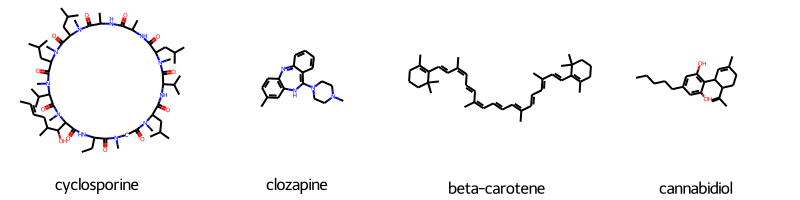

In [2]:
smiles_1 = 'CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C' # Cyclosporine
smiles_2 = 'CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C' # Clozapine
smiles_3 = 'CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C' # Beta-carotene
smiles_4 = 'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O' # Cannabidiol
smiles_list = [smiles_1, smiles_2, smiles_3, smiles_4]
names_list = ['cyclosporine', 'clozapine', 'beta-carotene', 'cannabidiol']
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

Draw.MolsToGridImage(mol_list, legends=names_list, molsPerRow=4)

### Calculate rule of five molecular properties and plot them

The chemical properties relevant for the rule of five are calculated and visually compared:

* Calculate molecular weight, number of h-bond acceptors and donors, and logP.
*  Using the predefined functions in the [rdkit descriptor library](http://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation)

In [3]:
MWs = [Descriptors.ExactMolWt(mol) for mol in mol_list]
HBAs = [Descriptors.NumHAcceptors(mol) for mol in mol_list]
HBDs = [Descriptors.NumHDonors(mol) for mol in mol_list]
LogPs = [Descriptors.MolLogP(mol) for mol in mol_list]
parameters = [MWs, HBAs, HBDs, LogPs]
print('Molecular weight of the four compounds:',MWs)

Molecular weight of the four compounds: [1201.841367992, 306.184446704, 536.438201792, 314.2245802]


* Plot the properties per molecule as bar plots.

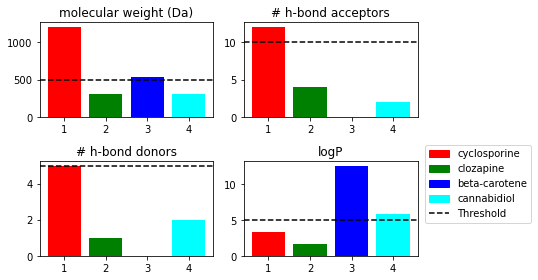

In [4]:
# Start 2x2 plot frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
axes = [ax1, ax2, ax3, ax4]
x = np.arange(1, len(mol_list)+1)
colors = ['red', 'green', 'blue', 'cyan']

# Create subplots
for index in x-1:
    axes[index].bar(x, parameters[index], color=colors)

# Add rule of five thresholds as dashed lines
ax1.axhline(y=500, color="black", linestyle="dashed")
ax1.set_title("molecular weight (Da)")
ax2.axhline(y=10, color="black", linestyle="dashed")
ax2.set_title("# h-bond acceptors")
ax3.axhline(y=5, color="black", linestyle="dashed")
ax3.set_title("# h-bond donors")
ax4.axhline(y=5, color="black", linestyle="dashed")
ax4.set_title("logP")

# Add legend
legend_elements = [mpatches.Patch(color=colors[i], label=names_list[i]) for i in range(len(mol_list))]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.25, 0.5))

# Fit subplots and legend into figure
plt.tight_layout()

plt.show()

In the above bar chart we compared the rule of five properties (molecular weight, number of hydrogen bond donors and acceptors, LogP) for four example molecules. We can see that the four example drug molecules have different properties. In the next steps, we will investigate for each compound individually whether it violates the rule of five.

### Investigate compliance with Lipinski's rule of five

A function is defined to investigate whether a compound violates the rule of five and is applied to our example compounds.

In [5]:
def test_rule_of_five(smi):
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    # Return True if no more than one out of four conditions is violated
    return conditions.count(True) >= 3

In [6]:
for i in range(len(smiles_list)):
    smi=smiles_list[i]
    name=names_list[i]
    print("Rule of five accepted for %s: %s "%(name,test_rule_of_five(smi)))                

Rule of five accepted for cyclosporine: False 
Rule of five accepted for clozapine: True 
Rule of five accepted for beta-carotene: False 
Rule of five accepted for cannabidiol: True 


Our `test_rule_of_five` function yields that two of the four example molecules do not pass the rule of five. From this we can interpret that cyclosporin and betacarotene are most likely not orally bioavailable. As all of them are available on the market as drugs, they must reach their target somehow. They could be exceptions of the rule, or they might be administered via a route different from oral administration. 

### Apply rule of five to the EGFR dataset

The `test_rule_of_five` function can be used to filter the main dataset by compliance with Lipinski's rule of five.

* Adjust the function to return all chemical parameters related to the rule of five
* Load main dataframe (`ChEMBL_df`)
* Apply rule of five function to `ChEMBL_df`
* Filter `ChEMBL_df` by  compounds that violate more than one rule
* Save filtered dataframe

In [7]:
def df_rule_of_five(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # Create pandas row for conditions results with values and information whether rule of five is violated
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])


In [8]:
ChEMBL_df = pd.read_csv('../data/T1/EGFR_compounds.csv', index_col=0)
print(ChEMBL_df.shape)
ChEMBL_df.head()

(6020, 5)


,molecule_chembl_id,units,IC50,smiles,pIC50
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
3,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910
4,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910


In [9]:
# Apply ruleOfFive to dataset to get rule of five results (may take a while)
rule5_prop_df = ChEMBL_df.apply(df_rule_of_five, axis=1)

# Name condition columns
rule5_prop_df.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']

In [10]:
# Concatenate dataset with computed values
ChEMBL_df = ChEMBL_df.join(rule5_prop_df)

In [11]:
# Delete empty rows --> rule of five
filtered_df = ChEMBL_df[ChEMBL_df['rule_of_five_conform']=='yes']

In [12]:
# Info about data
print('# of compounds in unfiltered data set:', len(ChEMBL_df))
print('# of compounds in filtered data set:', len(filtered_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(ChEMBL_df)-len(filtered_df)))

# Save filtered data 
filtered_df.to_csv('../data/T2/EGFR_compounds_lipinski.csv', sep=';') 
filtered_df.head(10)

# of compounds in unfiltered data set: 6020
# of compounds in filtered data set: 4925
# of compounds not compliant with Lipinski's rule of five: 1095


,molecule_chembl_id,units,IC50,smiles,pIC50,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.28910,yes
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.59690,yes
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.93330,yes
3,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.01220,yes
4,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.57260,yes
5,CHEMBL176582,nM,0.010,Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc21,11.000000,353.027607,5,1,4.02260,yes
6,CHEMBL29197,nM,0.025,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,10.602060,359.026939,5,1,4.15310,yes
7,CHEMBL174426,nM,0.025,Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc21,10.602060,353.027607,5,1,4.02260,yes
8,CHEMBL1243316,nM,0.030,C#CCNC/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N...,10.522879,477.136781,6,3,4.75878,yes
9,CHEMBL3613702,nM,0.037,C=CC(=O)Nc1ccc2ncnc(Nc3cc(F)c(Cl)c(Cl)c3)c2c1,10.431798,376.029395,4,2,4.94380,yes


### Radar plot for visualization of rule of five properties

First, we define a function that defines the mean and standard deviations of a dataset. 

These statistics will be lateron used to plot the Lipinski's rule of five related parameters of a dataset.

In [13]:
def get_properties_stats(data_df):
    """
    Function that calculates the mean and standard deviation of physicochemical properties of a dataset.
    
    Input: 
    Dataset containing per compound values for physicochemical properties
    HBD, HBA, MW and LogP as columns (with exactly these names).
    
    Output:
    Dataframe with mean and std (columns) for each physicochemical property (rows).
    """
    properties = ["HBD", "HBA", "MW", "LogP"]
    
    data_stats = []
    
    for i in properties:
        std = data_df[i].std()
        mean = data_df[i].mean()
        da = pd.DataFrame([[round(mean, 2), round(std, 2)]], index=[i], columns=["mean", "std"])
        data_stats.append(da)
    
    data_stats = pd.concat(data_stats)
    
    return data_stats

We calculate the statistic for the dataset of compounds compliant with Lipinski's rule of five (filtered dataset).

In [14]:
stats_rof = get_properties_stats(filtered_df)
stats_rof

,mean,std
HBD,1.89,1.01
HBA,6.06,1.89
MW,417.38,88.70
LogP,4.07,1.19


We calculate the statistic for the dataset of compounds NOT compliant with Lipinski's rule of five.

In [15]:
stats_not_rof = get_properties_stats(ChEMBL_df[ChEMBL_df['rule_of_five_conform']=='no'])
stats_not_rof

,mean,std
HBD,2.23,1.62
HBA,8.04,2.23
MW,587.82,96.77
LogP,5.96,1.38


We create a function to visualize the compound properties with a radar chart. For this, we follow a [tutorial on stackoverflow](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot).

In [16]:
def plot_radarplot(data_stats, output_path):
    """
    Function that plots a radar plot based on the mean and std of 4 physicochemical properties (HBD, HBA, MW and LogP).
    
    Input: 
    Dataframe with mean and std (columns) for each physicochemical property (rows).
    
    Output:
    Radar plot (saved as file and shown in Jupyter notebook).
    """

    # Get data points for lines
    std_1 = [data_stats["mean"]["HBD"] + data_stats["std"]["HBD"], 
             (data_stats["mean"]["HBA"]/2) + (data_stats["std"]["HBA"]/2), 
             (data_stats["mean"]["MW"]/100) + (data_stats["std"]["MW"]/100), 
             data_stats["mean"]["LogP"] + data_stats["std"]["LogP"]]
    std_2 = [data_stats["mean"]["HBD"] - data_stats["std"]["HBD"], 
             (data_stats["mean"]["HBA"]/2) - (data_stats["std"]["HBA"]/2), 
             (data_stats["mean"]["MW"]/100) - (data_stats["std"]["MW"]/100), 
             data_stats["mean"]["LogP"] - data_stats["std"]["LogP"]]
    mean_val = [data_stats["mean"]["HBD"], (data_stats["mean"]["HBA"]/2), 
                (data_stats["mean"]["MW"]/100), data_stats["mean"]["LogP"]]

    # Get data points for (filled) area (rule of five)
    rule_conditions = [5, (10/2), (500/100), 5]
    
    # Define property names
    parameters = ['# H-bond donors', '# H-bond acceptors/2', 'Molecular weight (Da)/100', 'LogP']

    # 
    N = len(rule_conditions)

    # Set font size
    fontsize = 16

    # Angles for the condition axes
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Since our chart will be circular we need to append a copy of the first
    # Value of each list at the end of each list with data
    std_1 += std_1[:1]
    std_2 += std_2[:1]
    mean_val += mean_val[:1]
    rule_conditions += rule_conditions[:1]
    x_as += x_as[:1]

    # Set figure size
    plt.figure(figsize=(8,8))

    # Set color of axes
    plt.rc('axes', linewidth=2, edgecolor="#888888")

    # Create polar plot
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=2)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=2)

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([1, 3, 5, 7], ["1", "3", "5", "7"], size=fontsize)

    # Set axes limits
    plt.ylim(0, 7)

    # Plot data
    # Mean values
    ax.plot(x_as, mean_val, 'b', linewidth=3, linestyle='solid', zorder=3)

    # Standard deviation
    ax.plot(x_as, std_1,  linewidth=2, linestyle='dashed', zorder=3, color='#111111')
    ax.plot(x_as, std_2,  linewidth=2, linestyle='dashed', zorder=3, color='#333333')

    # Fill area
    ax.fill(x_as, rule_conditions, "#3465a4", alpha=0.2)

    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 1
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1
        ax.text(angle_rad, 7 + distance_ax, parameters[i], size=fontsize,
                horizontalalignment=ha, verticalalignment="center")

    # Add legend relative to top-left plot    
        labels = ('Mean', 'Mean + std', 'Mean - std', 'Rule of five area')
        legend = ax.legend(labels, loc=(1.1, .7),
                           labelspacing=0.3, fontsize=fontsize)
    plt.tight_layout()

    # Save plot - use bbox_inches to include text boxes:
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    # Show polar plot
    plt.show()

First, we plot the dataset filtered by the rule of five.

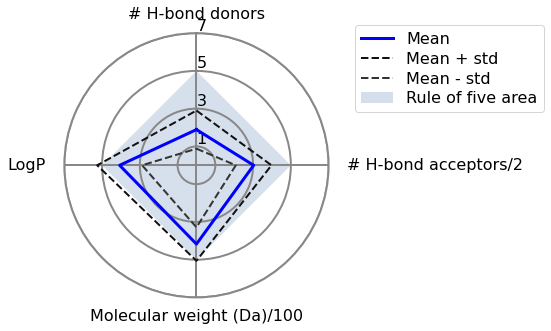

In [17]:
plot_radarplot(stats_rof, "../data/T2/radarplot_rof.png")

In the above created radar chart, the blue square shows the area where the physicochemical properties are within the rule of five. The blue line connects the mean values of our filtered dataset, while the dashed lines show the standard deviations. We can see that the mean values never violate any of Lipinski's rules. However, according to the standard deviation, some properties are still larger. This is acceptable; we have to keep in mind that one of the four property's rules may be violated.

Second, we take a look at the compounds that violate the rule of five.

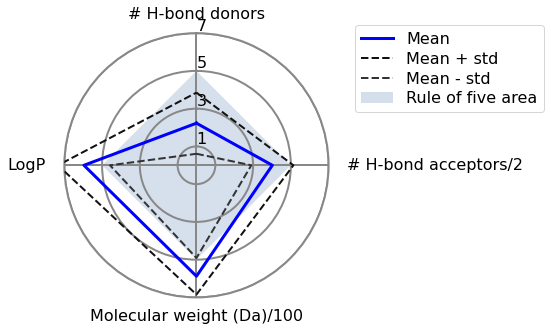

In [18]:
plot_radarplot(stats_not_rof, "../data/T2/radarplot_not_rof.png")

We see that compounds mostly violate the rule of five based on their logP value and their molecular weight.

## Discussion
Lipinski's rule of five focuses on oral bioavailability. Drugs can also be administered via alternative routes, i.e. inhalation, skin penetration and injection. Be aware, that the rule of five is a guide for estimation of oral bioavailability, there are exceptions in both ways. With bioavailability, we have looked at one of several ADME properties. 

There are webservers/programmes available to get a whole picture of ADME properties, e.g. [SwissADME](http://www.swissadme.ch/).

## Quiz
* In what way can the chemical properties described by the rule of five affect ADME?
* Find or design a molecule which violates three or four rules. 
* How can you plot information of an additional molecule in the above created radar chart?